In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\gold_monthly_csv.csv")

In [5]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [6]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

Exploratory Data Analysis

In [7]:
print(f"Date Range of gold prices ranges from {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")

Date Range of gold prices ranges from 1950-01 to 2020-07


In [8]:
date_range=pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')

In [9]:
date_range

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
df['date']=date_range
df=df.set_index('date')

In [11]:
df

,Date,Price
date,,
1950-01-31,1950-01,34.730
1950-02-28,1950-02,34.730
1950-03-31,1950-03,34.730
1950-04-30,1950-04,34.730
1950-05-31,1950-05,34.730
...,...,...
2020-03-31,2020-03,1593.764
2020-04-30,2020-04,1680.030
2020-05-31,2020-05,1715.697


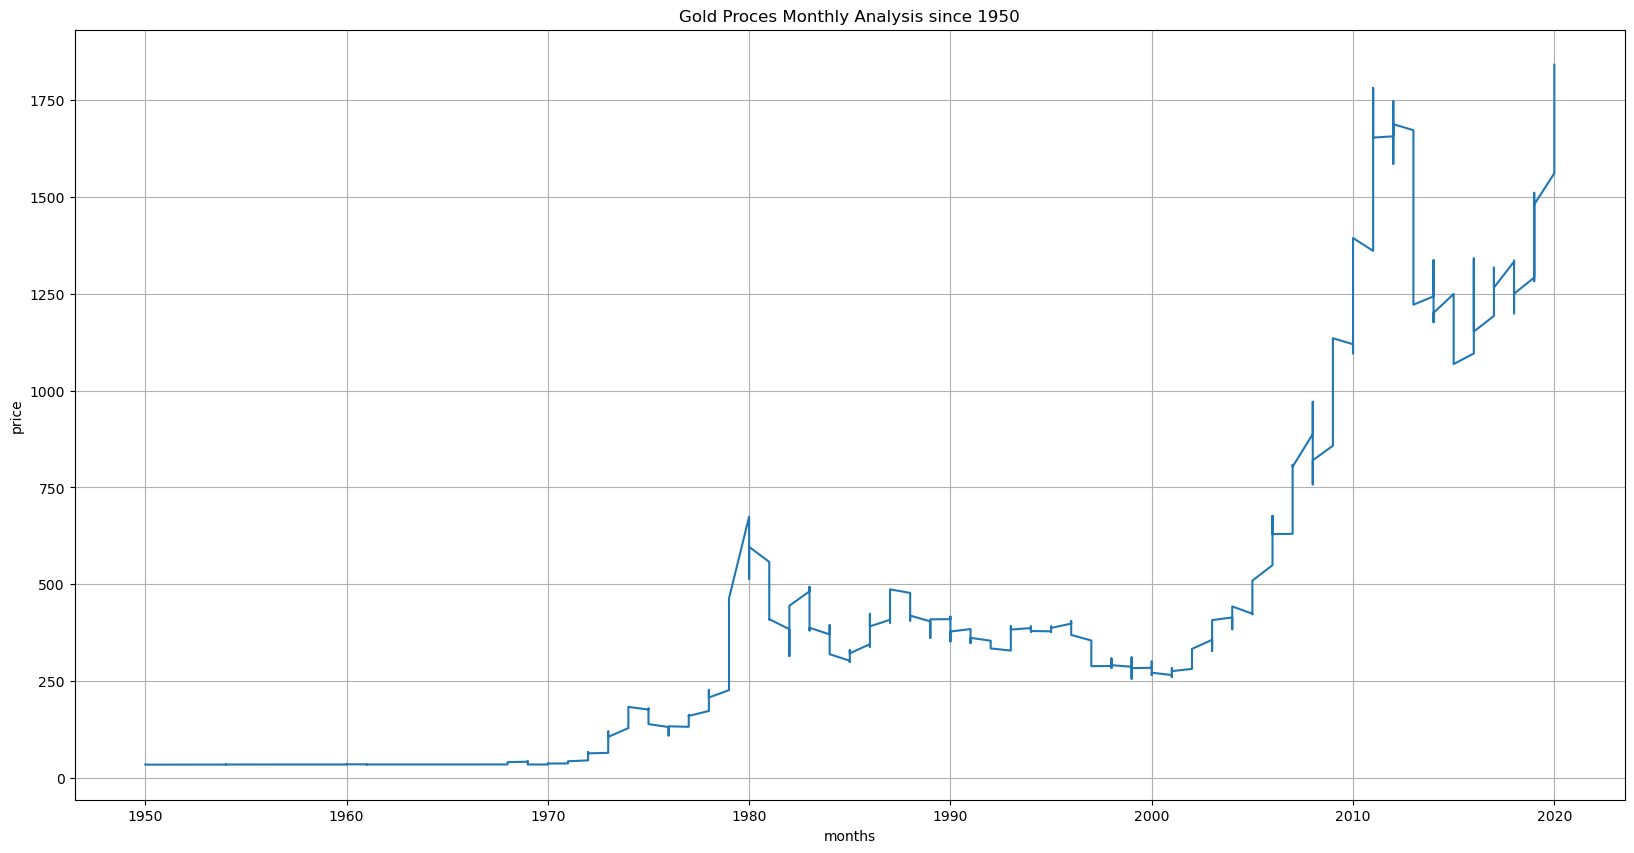

In [12]:
plt.figure(figsize=(20,10))
plt.title('Gold Proces Monthly Analysis since 1950')
plt.xlabel('months')
plt.ylabel('price')
plt.grid()
plt.plot(df.index.year,df['Price'])
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847 entries, 1950-01-31 to 2020-07-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.9+ KB


In [14]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [39]:
print(f"The average gold price since 1950 = {df['Price'].mean()}")
print(f"The Minimum price of gold since 1950 = {df['Price'].min()} on {df[df['Price']==df['Price'].min()]['Date'].values}")
print(f"The Maximum price of gold since 1950 = {df['Price'].max()} on {df[df['Price']==df['Price'].max()]['Date'].values}")
print(f"The Median value of gold price since 1950 = {df['Price'].median()}")
print(f"The 3rd quartile value of gold = {df.describe().loc['75%','Price']}")

The average gold price since 1950 = 416.5569055489965
The Minimum price of gold since 1950 = 34.49 on ['1952-01' '1952-02']
The Maximum price of gold since 1950 = 1840.807 on ['2020-07']
The Median value of gold price since 1950 = 319.622
The 3rd quartile value of gold = 447.029


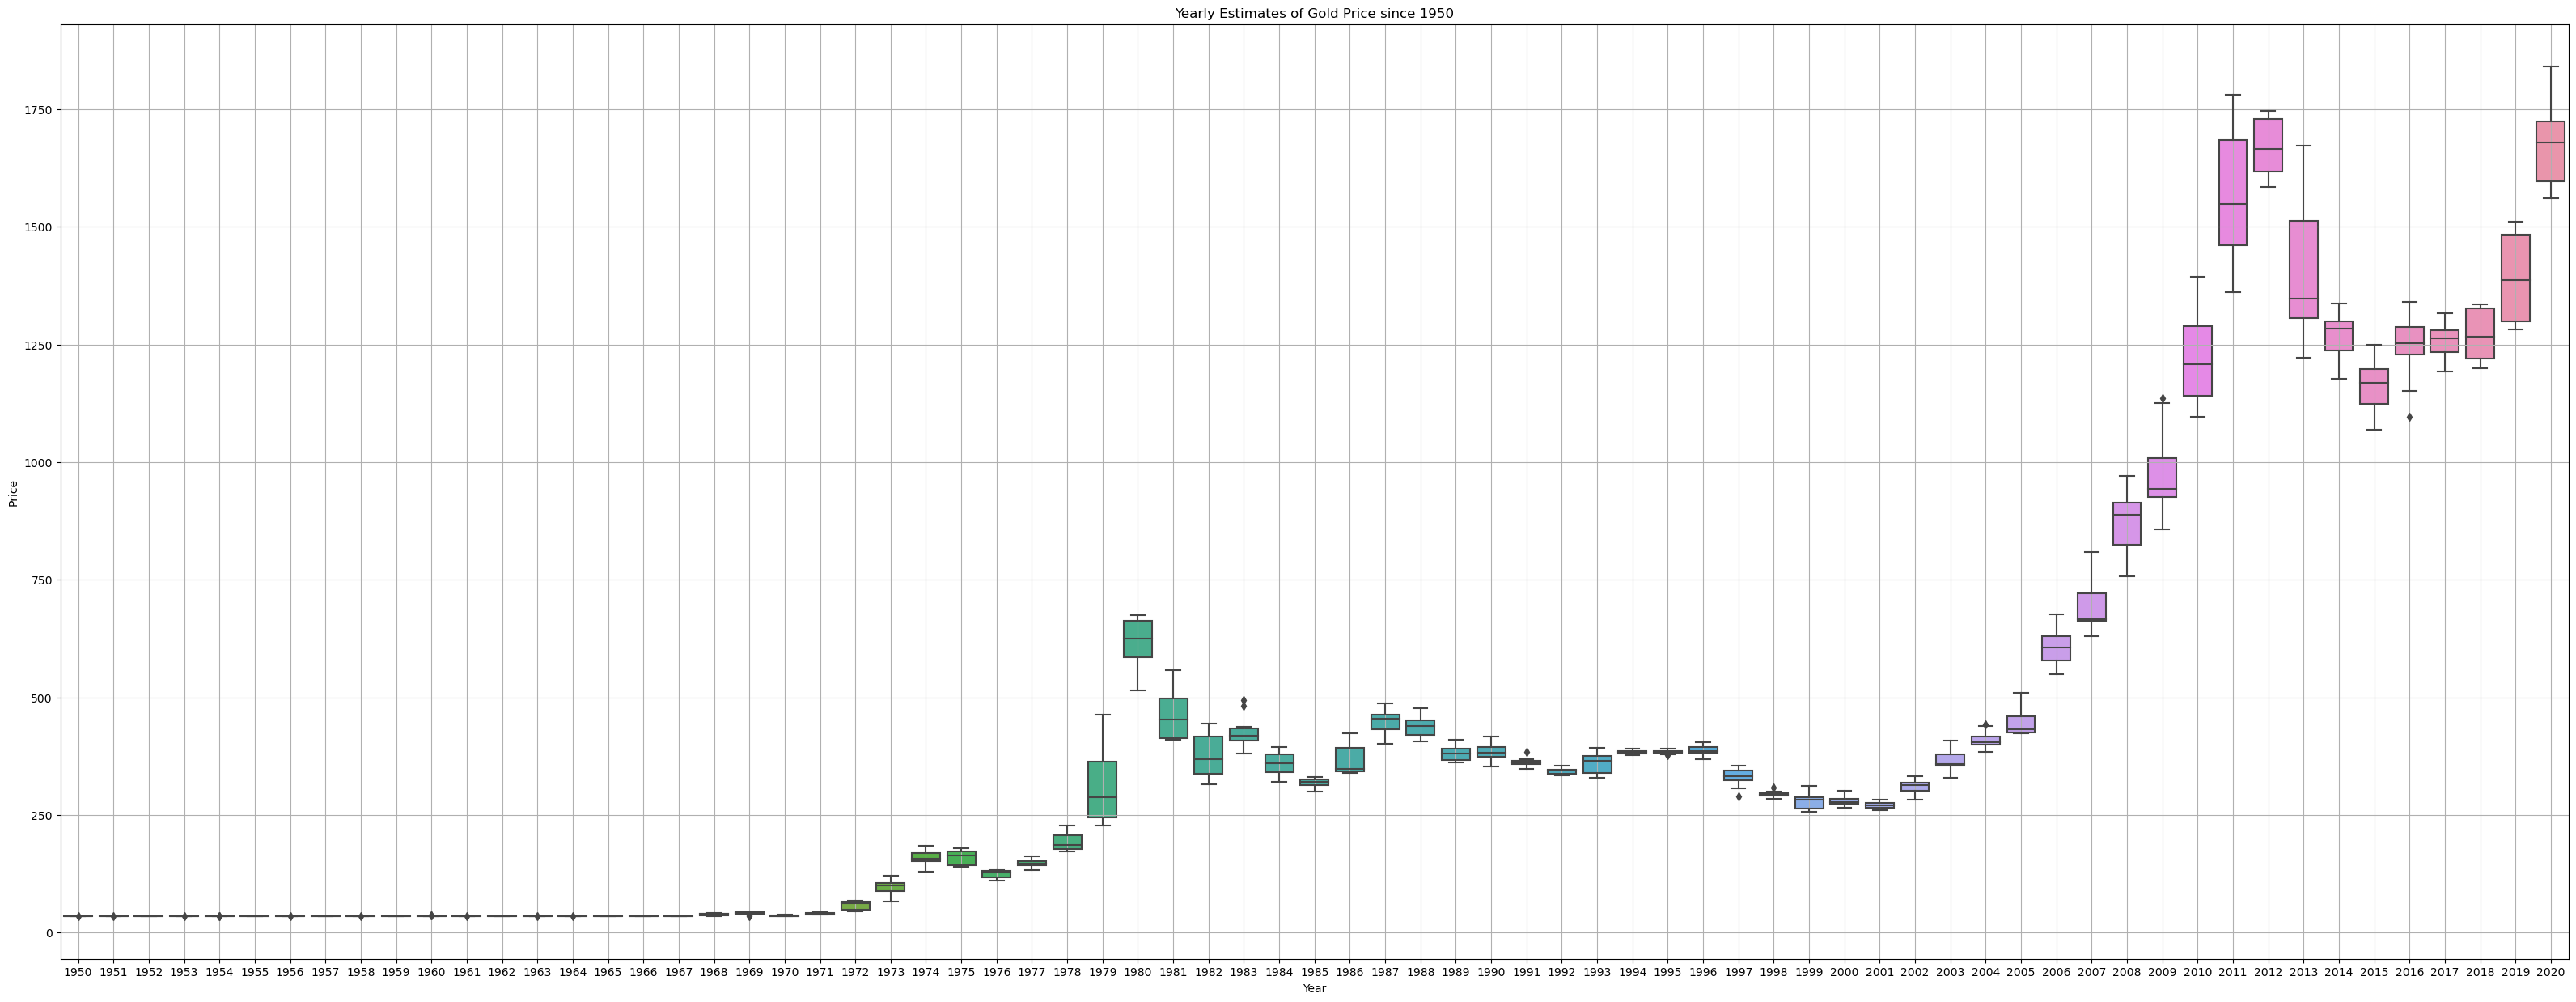

In [41]:
fig,ax=plt.subplots(figsize=(40,15))
sns.boxplot(x=df.index.year,y=df['Price'],ax=ax)
plt.title('Yearly Estimates of Gold Price since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

In [42]:
from statsmodels.graphics.tsaplots import month_plot

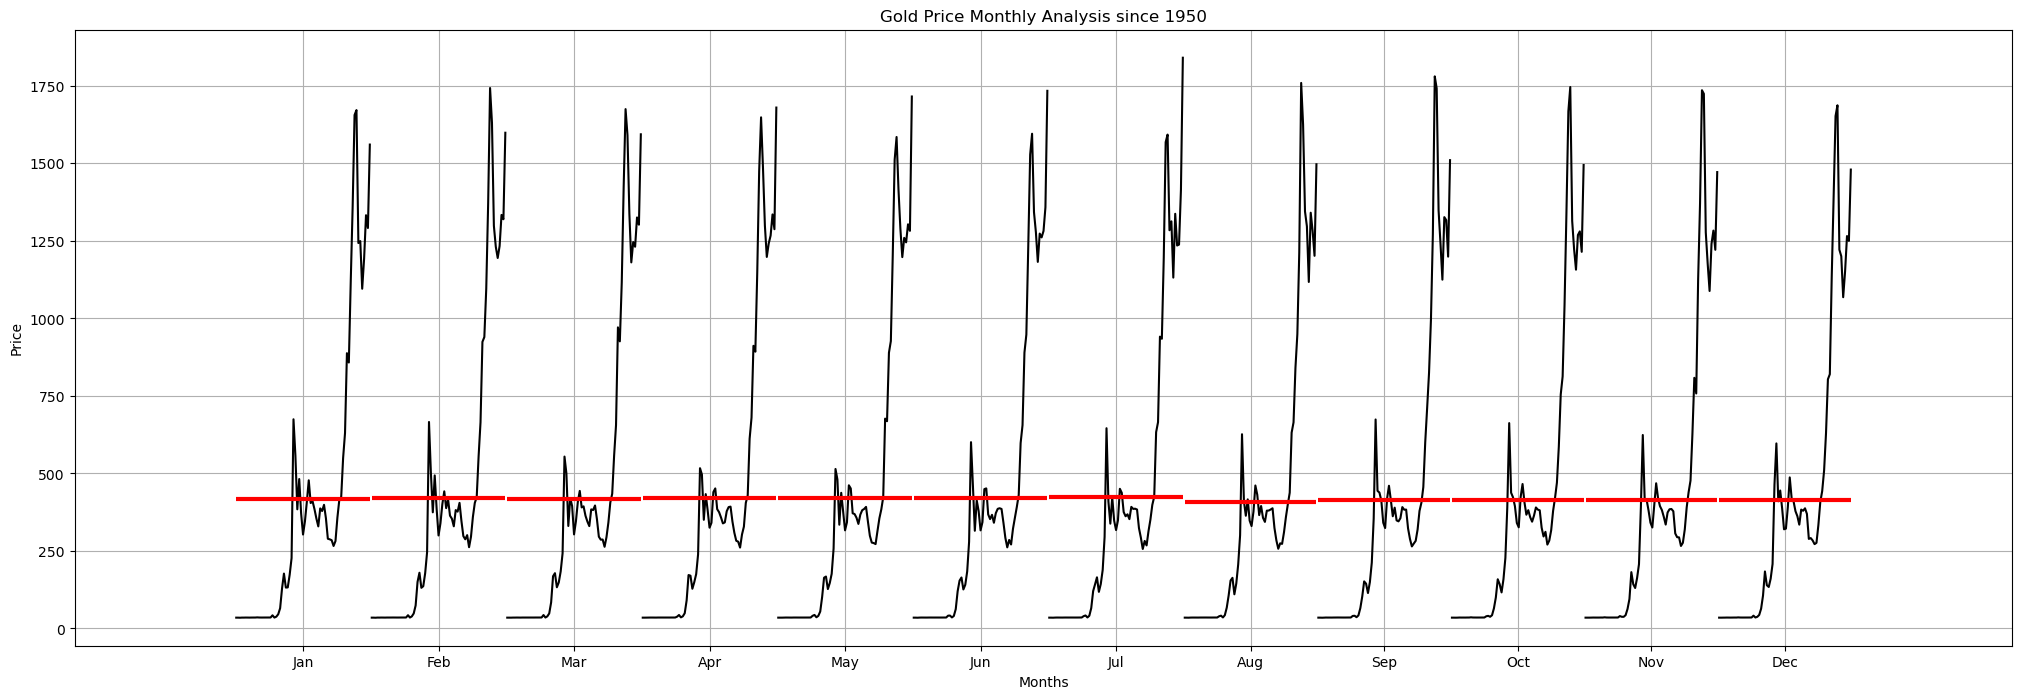

In [47]:
fig,ax=plt.subplots(figsize=(25,8))
month_plot(df.drop(columns='Date'),ax=ax)
plt.title('Gold Price Monthly Analysis since 1950')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()
plt.show()

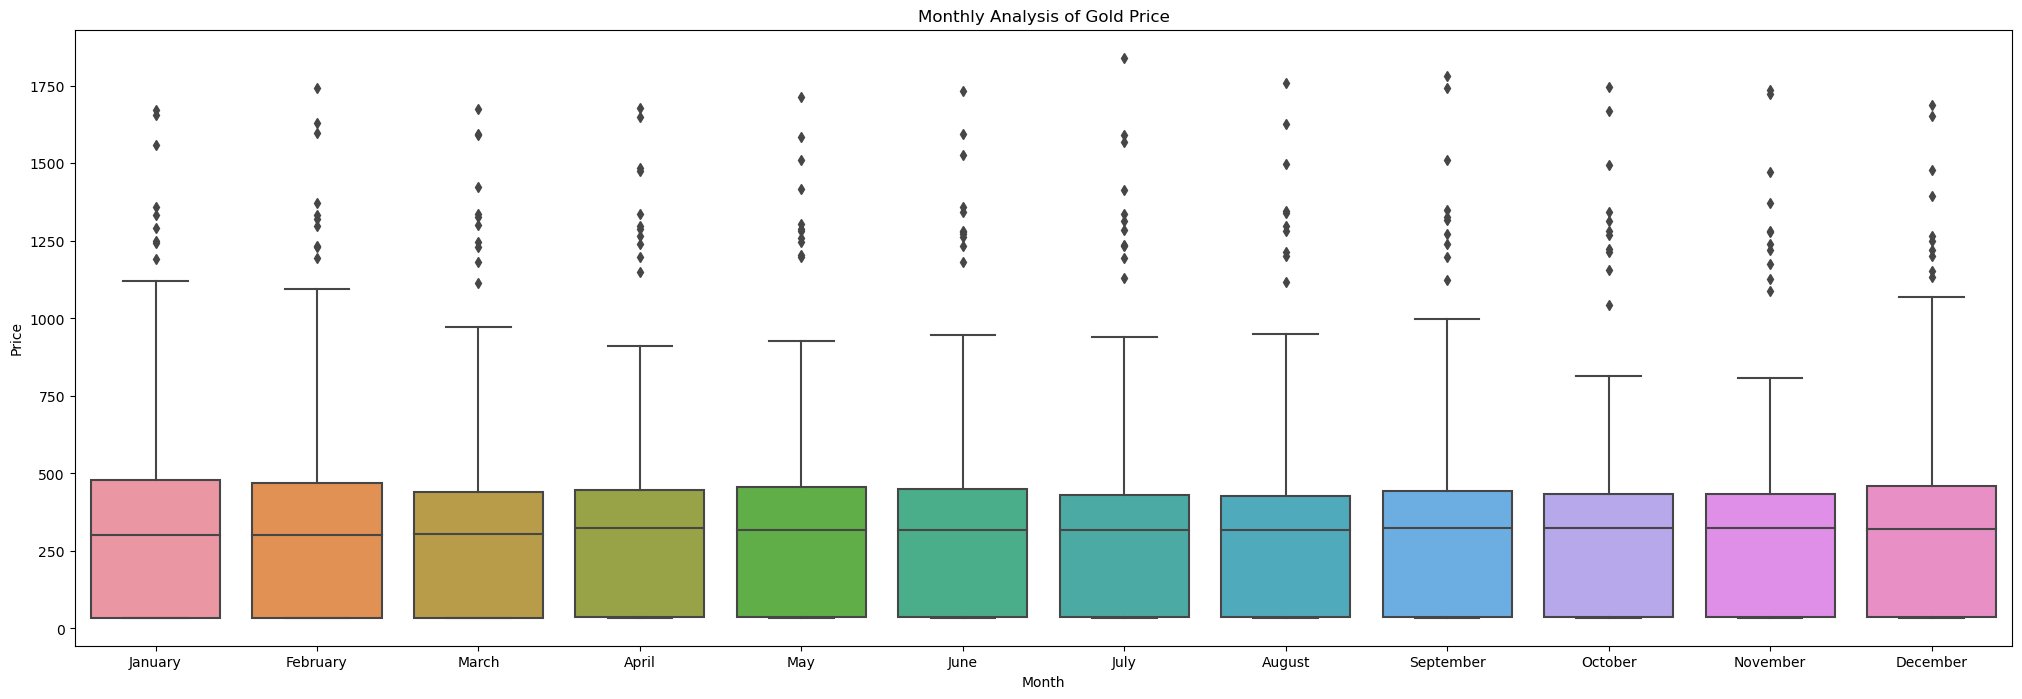

In [49]:
fig,ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.month_name(),y=df['Price'].values,ax=ax)
plt.title('Monthly Analysis of Gold Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [50]:
df=df.drop(columns='Date')

In [51]:
df

,Price
date,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


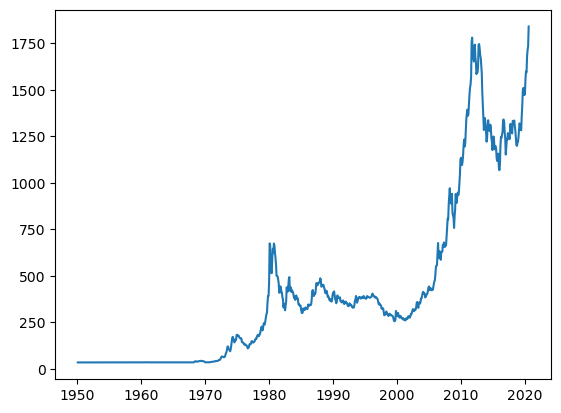

In [53]:
plt.plot(df)
plt.show()

In [54]:
df_year=df.resample('A').mean()

In [55]:
df_year

,Price
date,
1950-12-31,34.729167
1951-12-31,34.717500
1952-12-31,34.628333
1953-12-31,34.879167
1954-12-31,35.020000
...,...
2016-12-31,1248.161833
2017-12-31,1257.848583
2018-12-31,1269.852583


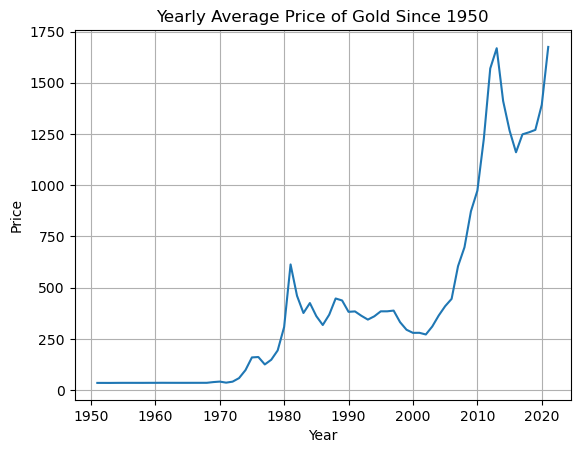

In [56]:
plt.plot(df_year)
plt.grid()
plt.title('Yearly Average Price of Gold Since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


283


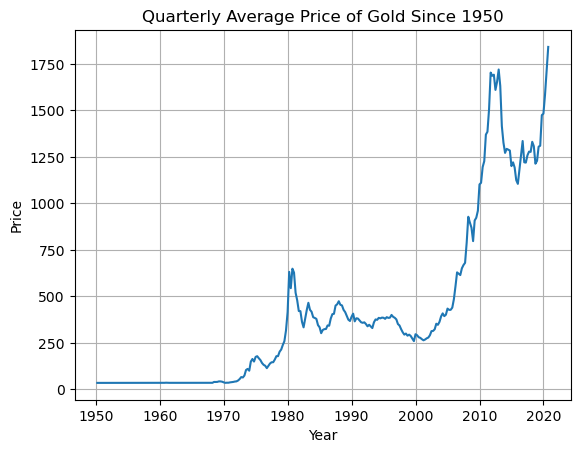

In [60]:
df_quarter=df.resample('Q').mean()
print(len(df_quarter))
plt.plot(df_quarter)
plt.grid()
plt.title('Quarterly Average Price of Gold Since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

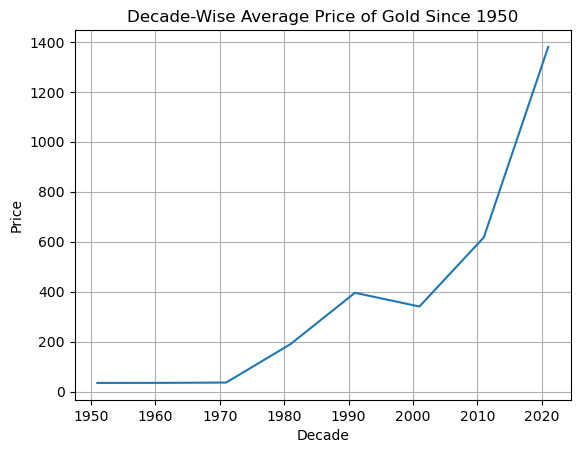

In [62]:
df_decade=df.resample('10Y').mean()
plt.plot(df_decade)
plt.grid()
plt.title('Decade-Wise Average Price of Gold Since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.show()


Coeficient of Variation Analysis

In [64]:
df1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})

In [65]:
df1

,Mean
date,
1950,34.729167
1951,34.717500
1952,34.628333
1953,34.879167
1954,35.020000
...,...
2016,1248.161833
2017,1257.848583
2018,1269.852583


In [66]:
df2=df.groupby(df.index.year).std().rename(columns={'Price':'STD'})

In [67]:
df2

,STD
date,
1950,0.002887
1951,0.020057
1952,0.117538
1953,0.056481
1954,0.082792
...,...
2016,73.454098
2017,32.529524
2018,54.900304


In [68]:
df3=df1.merge(df2,left_index=True,right_index=True)

In [69]:
df3

,Mean,STD
date,,
1950,34.729167,0.002887
1951,34.717500,0.020057
1952,34.628333,0.117538
1953,34.879167,0.056481
1954,35.020000,0.082792
...,...,...
2016,1248.161833,73.454098
2017,1257.848583,32.529524
2018,1269.852583,54.900304


In [71]:
df3['CV']=((df3['STD']/df3['Mean'])*100).round(2)

In [72]:
df3

,Mean,STD,CV
date,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


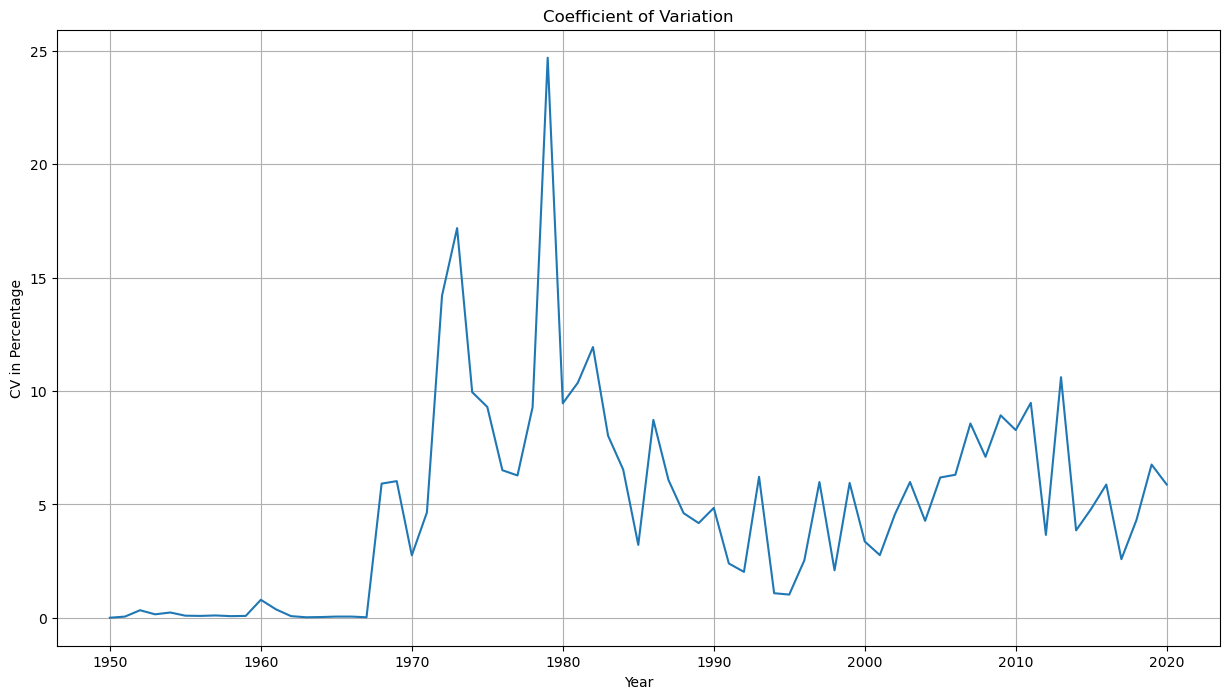

In [74]:
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(df3['CV'])
plt.title('Coefficient of Variation')
plt.xlabel('Year')
plt.ylabel('CV in Percentage')
plt.grid()
plt.show()

In [75]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

In [76]:
train.shape

(792, 1)

In [77]:
test.shape

(55, 1)

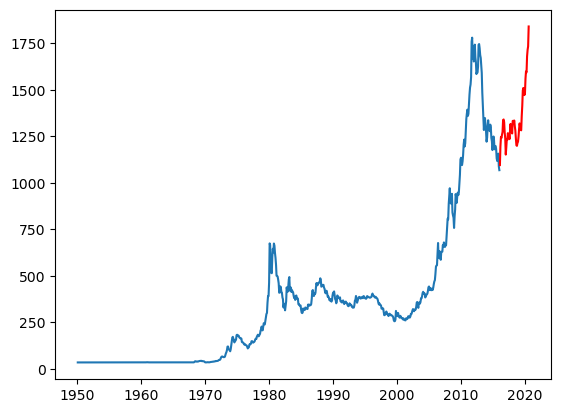

In [80]:
plt.plot(train)
plt.plot(test,c='r')
plt.show()

In [81]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+1+len(train) for i in range(len(test))]

In [82]:
train_time

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [83]:
X_train=train.copy()
X_test=test.copy()

In [84]:
X_train['time']=train_time
X_test['time']=test_time

In [85]:
X_train

,Price,time
date,,
1950-01-31,34.730,1
1950-02-28,34.730,2
1950-03-31,34.730,3
1950-04-30,34.730,4
1950-05-31,34.730,5
...,...,...
2015-08-31,1117.525,788
2015-09-30,1124.905,789
2015-10-31,1157.123,790


In [89]:
lr=LinearRegression()
lr.fit(np.array(X_train['time']).reshape(-1,1),np.array(X_train['Price']).reshape(-1,1))

LinearRegression()

In [92]:
pred=lr.predict(np.array(X_test['time']).reshape(-1,1))

In [93]:
X_test['pred']=pred

In [94]:
X_test

,Price,time,pred
date,,,
2016-01-31,1095.655,793,895.511067
2016-02-29,1194.893,794,896.880902
2016-03-31,1246.312,795,898.250736
2016-04-30,1241.452,796,899.620570
2016-05-31,1259.755,797,900.990404
2016-06-30,1273.580,798,902.360238
2016-07-31,1337.429,799,903.730072
2016-08-31,1340.861,800,905.099906
2016-09-30,1326.618,801,906.469740


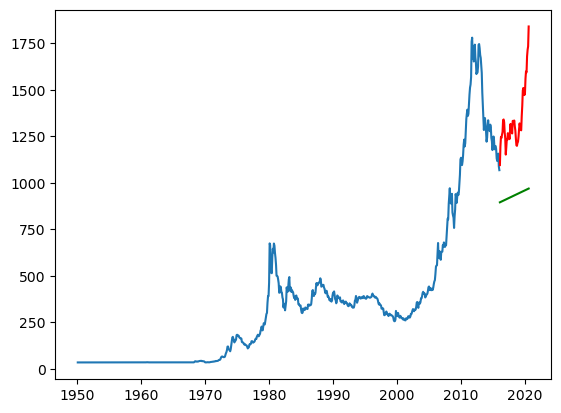

In [96]:
plt.plot(X_train['Price'],label='Train')
plt.plot(X_test['Price'],label='Actual',c='r')
plt.plot(X_test['pred'],label='Prediction',c='g')
plt.show()

In [98]:
def mape_func(actual,pred):
    return round(np.mean(np.abs((actual-pred)/actual)*100),2)

In [99]:
mape_model_test=mape_func(X_test['Price'],X_test['pred'])

In [101]:
mape_model_test

29.76

In [104]:
model=ExponentialSmoothing(df,trend='additive',seasonal='additive').fit(smoothing_level=0.4,smoothing_trend=0.3,smoothing_seasonal=0.6)

G:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [105]:
y_pred=model.forecast(steps=len(test))

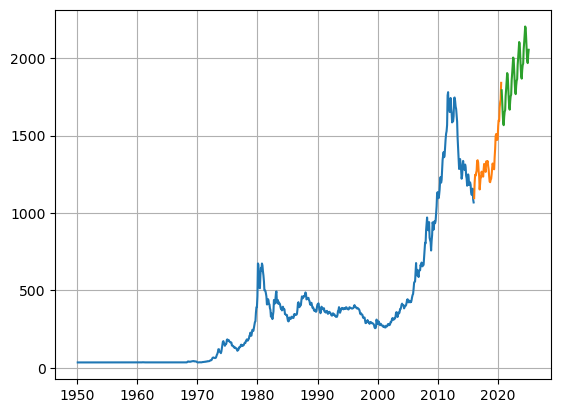

In [108]:
plt.plot(X_train['Price'])
plt.plot(X_test['Price'])
plt.plot(y_pred)
plt.grid()
plt.show()